# 15.1 Regrassion (Bakery)

Can we predict count from (month, hour, item_code)?

```python
count = prediction(month, hour, item_code)
```

In [1]:
#conda install matplotlib scikit-learn pandas jupyterlab seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#plt.style.use('ggplot')
plt.style.use('seaborn-paper')

# Read and Explore Data

In [3]:
df=pd.read_csv('bakery.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  6393 non-null   int64
 1   dayofweek   6393 non-null   int64
 2   month       6393 non-null   int64
 3   hour        6393 non-null   int64
 4   item_code   6393 non-null   int64
 5   counts      6393 non-null   int64
dtypes: int64(6)
memory usage: 299.8 KB


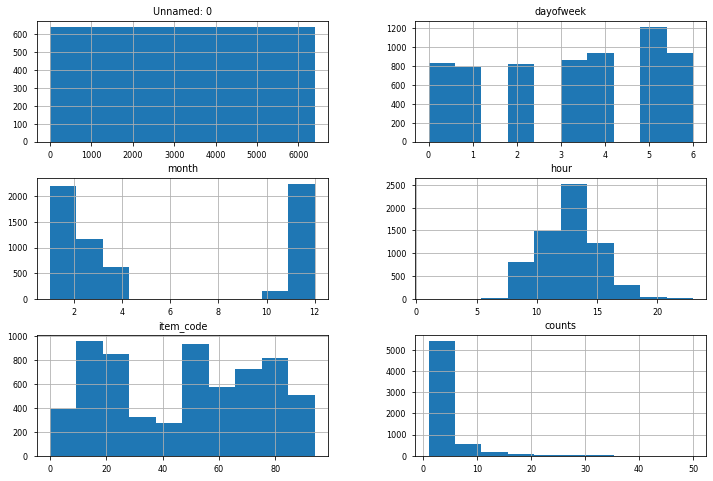

In [5]:
df.hist(figsize=(12,8));

# Plan for Data Preparation
```
 0   Unnamed: 0  6393 non-null   int64
 1   dayofweek   6393 non-null   int64
 2   month       6393 non-null   int64
 3   hour        6393 non-null   int64
 4   item_code   6393 non-null   int64
 5   counts      6393 non-null   int64
 
Use only ['item_code', 'dayofweek', 'hour'] to predict 'counts'
```

In [6]:
header=['counts','item_code', 'dayofweek', 'hour']
df2=df[header]
df2.sort_values(by='counts',ascending=False).head(10)

,counts,item_code,dayofweek,hour
6142,50,23,6,11
5122,47,23,5,11
4294,45,23,5,11
5669,41,23,6,11
5097,40,11,5,10
4501,39,23,5,11
5101,38,23,5,10
4526,35,23,5,12
5317,35,23,5,11
4736,35,23,5,11


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   counts     6393 non-null   int64
 1   item_code  6393 non-null   int64
 2   dayofweek  6393 non-null   int64
 3   hour       6393 non-null   int64
dtypes: int64(4)
memory usage: 199.9 KB


# Convert Dataframe to numpy-array

In [8]:
yx=df2.to_numpy()
yx.shape

(6393, 4)

In [9]:
x_train=yx[:,1:]
y_train=yx[:,0]

In [10]:
x_train.shape

(6393, 3)

In [11]:
y_train.shape

(6393,)

# Supervised Learning: Regression and R2 score

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression().fit(x_train, y_train)
reg_lin.score(x_train, y_train)

0.06388927453313997

reg.score() return $R^2$
* $R^2=1$ perfect model 
* $R^2=0$ base-line model
* $R^2<0$ worse model

In [13]:
from sklearn.linear_model import BayesianRidge
reg_rid = BayesianRidge().fit(x_train, y_train)
reg_rid.score(x_train, y_train)

0.06387457349277392

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
reg_grad = GradientBoostingRegressor().fit(x_train, y_train)
reg_grad.score(x_train, y_train)

0.618341529449875

In [15]:
df_item=pd.read_csv('../bakery_sku.csv')
df_item.head(30)

,id,item
0,0,Adjustment
1,1,Afternoon with the baker
2,2,Alfajores
3,3,Argentina Night
4,4,Art Tray
5,5,Bacon
6,6,Baguette
7,7,Bakewell
8,8,Bare Popcorn
9,9,Basket


In [19]:
#['item_code', 'dayofweek', 'month', 'hour']
#item_code: Coffee=23 Cake=15 Bread=11
#dayofweek: Monday=0, Sunday=6.
#hour: 9:00
item_code=25
dayofweek=0
for hour in range(24):
    x_predict=[[ item_code, dayofweek, hour]]
    count_prediction= reg_grad.predict(x_predict)
    print('hour: %02d, count_predection: %+.2f'%(hour, count_prediction[0]))

hour: 00, count_predection: -0.42
hour: 01, count_predection: -0.42
hour: 02, count_predection: -0.42
hour: 03, count_predection: -0.42
hour: 04, count_predection: -0.42
hour: 05, count_predection: -0.42
hour: 06, count_predection: -0.42
hour: 07, count_predection: -0.42
hour: 08, count_predection: +0.25
hour: 09, count_predection: +1.17
hour: 10, count_predection: +1.76
hour: 11, count_predection: +1.77
hour: 12, count_predection: +1.65
hour: 13, count_predection: +1.52
hour: 14, count_predection: +1.52
hour: 15, count_predection: +1.34
hour: 16, count_predection: +1.20
hour: 17, count_predection: +0.65
hour: 18, count_predection: +0.59
hour: 19, count_predection: +0.59
hour: 20, count_predection: +0.59
hour: 21, count_predection: +0.59
hour: 22, count_predection: +0.59
hour: 23, count_predection: +0.59
